# Credit card fraud detection

This project focuses on creating a machine learning model, which would allow to predict credit card fraud using the
Kaggle dataset - https://www.kaggle.com/mlg-ulb/creditcardfraud?select=creditcard.csv

## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from dask import compute
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


## Data Exploration

In [42]:
dtypes = {'V1': 'float32', 'V2': 'float32', 'V3': 'float32', 'V4': 'float32', 'V5': 'float32', 'V6': 'float32',
          'V7': 'float32', 'V8': 'float32', 'V9': 'float32', 'V10': 'float32', 'V11': 'float32', 'V12': 'float32',
          'V13': 'float32', 'V14': 'float32', 'V15': 'float32', 'V16': 'float32', 'V17': 'float32', 'V18': 'float32',
          'V19': 'float32', 'V20': 'float32', 'V21': 'float32', 'V22': 'float32', 'V23': 'float32', 'V24': 'float32',
          'V25': 'float32', 'V26': 'float32', 'V27': 'float32', 'V28': 'float32', 'Time': 'int32', 'Amount': 'float32',
          'Class': 'int32'}
data = dd.read_csv('./data/creditcard.csv', dtype=dtypes)
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.619995,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660004,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798279,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.989998,0


In [43]:
data.info()

<class 'dask.dataframe.core.DataFrame'>
Columns: 31 entries, Time to Class
dtypes: float32(29), int32(2)

In [44]:
compute(data.describe())

(                Time            V1            V2            V3            V4  \
 count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
 mean    94813.859575 -2.237832e-10  5.639038e-11  5.718183e-11 -5.515661e-11   
 std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
 min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
 25%     49346.000000 -7.868600e-01 -5.536365e-01 -7.156553e-01 -7.067841e-01   
 50%     94872.000000  9.301532e-02  8.999754e-02  1.743346e-01  1.809941e-01   
 75%    165830.000000  1.984825e+00  8.916958e-01  1.373682e+00  1.012508e+00   
 max    172792.000000  2.454930e+00  2.205773e+01  9.382559e+00  1.687534e+01   
 
                  V5            V6            V7            V8            V9  \
 count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
 mean   2.642803e-11 -1.983622e-10 -1.104466e-10  5.347500e-11  2.419927e-11   
 std    1.380247e+00  1.33227

## Data Preprocessing

In [45]:
compute(data.isnull().sum())

(Time      0
 V1        0
 V2        0
 V3        0
 V4        0
 V5        0
 V6        0
 V7        0
 V8        0
 V9        0
 V10       0
 V11       0
 V12       0
 V13       0
 V14       0
 V15       0
 V16       0
 V17       0
 V18       0
 V19       0
 V20       0
 V21       0
 V22       0
 V23       0
 V24       0
 V25       0
 V26       0
 V27       0
 V28       0
 Amount    0
 Class     0
 dtype: int64,)

In [46]:
X = data.drop(columns=['Class'])
y = data['Class']

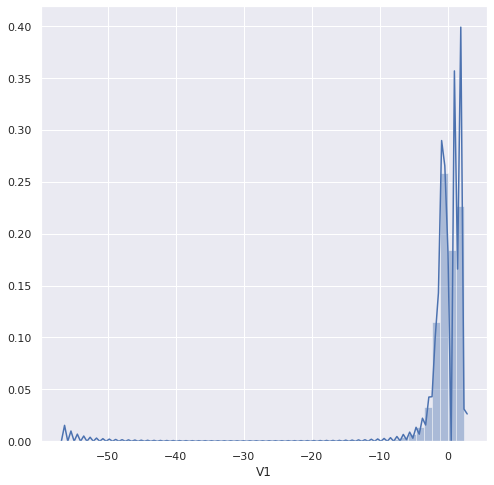

In [47]:
plt.figure(figsize=(8,8))
sns.distplot(X['V1'])

